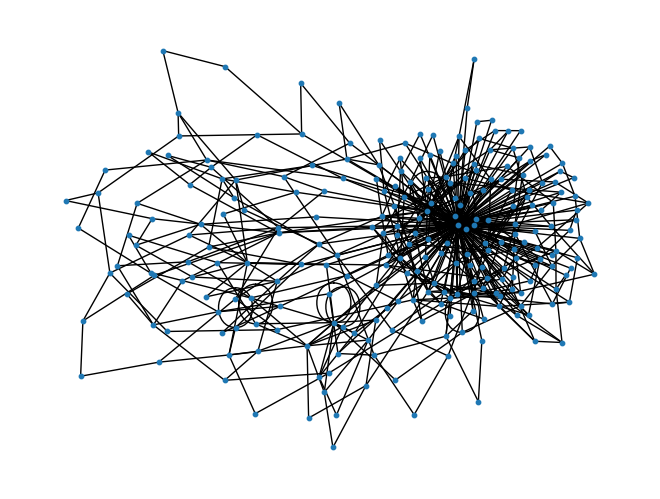

In [15]:
import networkx as nx

from networkx.generators.community import LFR_benchmark_graph
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

# 可视化网络
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10)

In [6]:
import networkx as nx
import community # 这是Louvain算法的实现
from sklearn.metrics import normalized_mutual_info_score
# 生成LFR网络
N = 400
tau1 = 2.0
tau2 = 1.5
mu = 0.1
G = nx.LFR_benchmark_graph(N, tau1, tau2, mu, average_degree=5, min_community=20, seed=0)

# GN算法
gn_partition = list(nx.community.girvan_newman(G))
gn_community = [list(c) for c in next(gn_partition)]

# Louvain算法
louvain_partition = community.best_partition(G)
louvain_community = [[] for _ in range(max(louvain_partition.values())+1)]
for node, comm in louvain_partition.items():
    louvain_community[comm].append(node)

# FN算法
fn_community = nx.algorithms.community.asyn_fluidc(G, k=10)

# 标签传播算法
lpa_community = list(nx.algorithms.community.label_propagation_communities(G))

# 计算NMI值
from sklearn.metrics.cluster import normalized_mutual_info_score
true_partition = nx.get_node_attributes(G, "community")
gn_nmi = normalized_mutual_info_score(list(true_partition.values()), gn_community)
louvain_nmi = normalized_mutual_info_score(list(true_partition.values()), louvain_community)
fn_nmi = normalized_mutual_info_score(list(true_partition.values()), fn_community)
lpa_nmi = normalized_mutual_info_score(list(true_partition.values()), lpa_community)

# 可视化结果
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
y = np.array([gn_nmi, louvain_nmi, fn_nmi, lpa_nmi])
plt.plot(x, y, 'o-')
plt.xlabel('u')
plt.ylabel('NMI')
plt.xticks(x)
plt.show()

TypeError: 'list' object is not an iterator

**第四题NetworkX生成LFR**

In [37]:
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import numpy as np

# 生成 LFR 网络
def generate_lfr_network(mu):
    n = 300
    tau1 = 3
    tau2 = 1.5
    return nx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, max_degree=20, seed=10)

# 计算 NMI
def compute_nmi(true_partition, predicted_partition):
    true_labels = [community for node, community in sorted(true_partition.items())]
    predicted_labels = [community for node, community in sorted(predicted_partition.items())]
    return normalized_mutual_info_score(true_labels, predicted_labels)

# 计算各种社团划分算法的 NMI
def calculate_nmi_lfr(mu_values):
    gn_nmis = []
    louvain_nmis = []
    fn_nmis = []
    label_propagation_nmis = []

    for mu in mu_values:
        G = generate_lfr_network(mu)
        true_partition = nx.get_node_attributes(G, "community")
        
        # Girvan-Newman 算法
        gn_communities = community.girvan_newman(G)
        gn_predicted_partition = {node: idx for idx, community in enumerate(next(gn_communities)) for node in community}
        gn_nmi = compute_nmi(true_partition, gn_predicted_partition)
        gn_nmis.append(gn_nmi)

        # Louvain 算法
        louvain_partition = community_louvain.best_partition(G)
        louvain_nmi = compute_nmi(true_partition, louvain_partition)
        louvain_nmis.append(louvain_nmi)

        # FastGreedy (FN) 算法
        fn_communities = community.greedy_modularity_communities(G)
        fn_predicted_partition = {node: idx for idx, community in enumerate(fn_communities) for node in community}
        fn_nmi = compute_nmi(true_partition, fn_predicted_partition)
        fn_nmis.append(fn_nmi)

        # 标签传播算法
        label_propagation_communities = list(community.label_propagation_communities(G))
        label_propagation_predicted_partition = {node: idx for idx, community in enumerate(label_propagation_communities) for node in community}
        label_propagation_nmi = compute_nmi(true_partition, label_propagation_predicted_partition)
        label_propagation_nmis.append(label_propagation_nmi)

    return gn_nmis, louvain_nmis, fn_nmis, label_propagation_nmis

mu_values = np.linspace(0.1, 0.8, 7)
gn_nmis, louvain_nmis, fn_nmis, label_propagation_nmis = calculate_nmi_lfr(mu_values)

# 绘制结果
plt.plot(mu_values, gn_nmis, label="Girvan-Newman")
plt.plot(mu_values, louvain_nmis, label="Louvain")
plt.plot(mu_values, fn_nmis, label="FastGreedy (FN)")
plt.plot(mu_values, label_propagation_nmis, label="Label Propagation")

# 设置图形属性
plt.xlabel("Mixing parameter μ")
plt.ylabel("NMI")
plt.title("Community Detection Algorithms on LFR Networks")
plt.legend()

# 显示图形
plt.show()

KeyboardInterrupt: 

In [38]:
import igraph as ig
from sklearn.metrics import normalized_mutual_info_score

# 生成LFR网络
n = 1000
tau1 = 2.5
tau2 = 1.5
mu = 0.1
g = ig.Graph.LFR(n, tau1, tau2, mu)

# 使用FN算法对LFR网络进行社团划分
fg = g.community_fastgreedy()
clusters = fg.as_clustering().membership

# 计算NMI值
true_labels = g.vs['community']
nmi = normalized_mutual_info_score(true_labels, clusters)

# 输出NMI值
print('NMI:', nmi)

AttributeError: type object 'Graph' has no attribute 'LFR'

In [35]:
from networkx.generators.community import LFR_benchmark_graph as lfr

def generate_graph(n_low=250, n_high=10000):
    n = np.random.randint(n_low, n_high)
    tau1 = 3
    tau2 = 1.5
    mu = np.random.uniform(0.03, 0.75)
    max_degree = int(0.1 * n)
    max_community = int(0.1 * n)
    average_degree = 20
    G = lfr(
        n,
        tau1,
        tau2,
        mu,
        average_degree=average_degree,
        max_community=max_community,
        max_degree=max_degree,
        seed=10,
    )
    return G
generate_graph()

ExceededMaxIterations: Could not assign communities; try increasing min_community

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import asyn_lpa_communities as lpa

G = nx.karate_club_graph() # 空手道俱乐部
com = list(lpa(G))
print(' 社区数量',len(com))

# 下面是画图
pos = nx.spring_layout(G) # 节点的布局为 spring 型

NodeId = list(G.nodes())
node_size = [G.degree(i)**1.2*90 for i in NodeId] # 节点大小

plt.figure(figsize = (8,6)) # 图片大小
nx.draw(G,pos, with_labels=True, node_size =node_size, node_color='w', node_shape = '.')
'''
node_size 表示节点大小
node_color 表示节点颜色
with_labels=True 表示节点是否带标签
'''
color_list = ['pink','orange','r','g','b','y','m','gray','black','c','brown']

for i in range(len(com)):
    nx.draw_networkx_nodes(G, pos, nodelist=com[i], node_color=color_list[i])

plt.show()

In [2]:
import numpy as np

from communities.algorithms import louvain_method

adj_matrix = np.array([[0, 1, 1, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0], 
                       [1, 1, 0, 1, 0, 0], 
                       [0, 0, 1, 0, 1, 1],   
                       [0, 0, 0, 1, 0, 1],
                       [0, 0, 0, 1, 1, 0]])

communities, _ = louvain_method(adj_matrix)
print(communities)

[{0, 1, 2}, {3, 4, 5}]


生成了一个μ为0.3的网络
生成了一个μ为0.5的网络


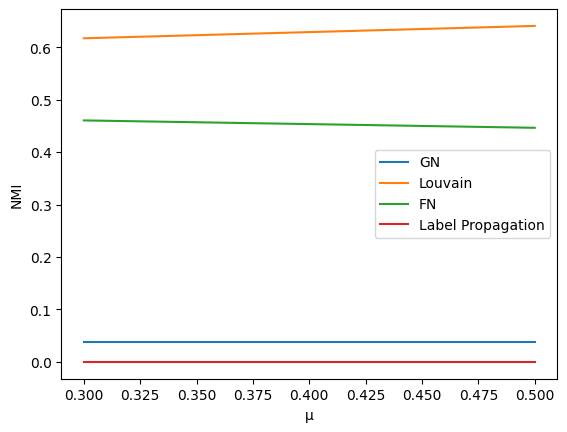

In [26]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *

import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import LabelBinarizer

# 构建一个 Karate Club 图
G = nx.karate_club_graph()

# 使用 Girvan-Newman 算法发现网络中的社区
gn_partition = girvan_newman(G)

from networkx.generators.community import LFR_benchmark_graph
n = 250
tau1 = 3
tau2 = 1.5
mu = linspace(0.3, 0.5, 2)
# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
for m in mu:
    G = LFR_benchmark_graph(
    n, tau1, tau2, m, average_degree=5, min_community=20, seed=10
)
    print(f"生成了一个μ为{m}的网络")
    # GN算法
    gn_partition = girvan_newman(G)
    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}

    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    gn_communities = community.best_partition(G, resolution = 1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    lp_partition = list(lpa(G))
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()]
    nmi_lp.append(normalized_mutual_info_score(list(nx.get_node_attributes(G, 'community').values()), lp_labels_pred))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN')
plt.plot(mu, nmi_louvain, label='Louvain')
plt.plot(mu, nmi_fn, label='FN')
plt.plot(mu, nmi_lp, label='Label Propagation')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()


In [27]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *

import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import LabelBinarizer

# 构建一个 Karate Club 图
G = nx.karate_club_graph()

# 使用 Girvan-Newman 算法发现网络中的社区
gn_partition = girvan_newman(G)

from networkx.generators.community import LFR_benchmark_graph
n = 250
tau1 = 3
tau2 = 1.5
mu = linspace(0.1, 0.9, 9)
# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
for m in mu:
    G = LFR_benchmark_graph(
    n, tau1, tau2, m, average_degree=5, min_community=20
)
    print(f"生成了一个μ为{m}的网络")
    # GN算法
    gn_partition = girvan_newman(G)
    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}

    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    gn_communities = community.best_partition(G, resolution = 1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    lp_partition = list(lpa(G))
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()]
    nmi_lp.append(normalized_mutual_info_score(list(nx.get_node_attributes(G, 'community').values()), lp_labels_pred))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN')
plt.plot(mu, nmi_louvain, label='Louvain')
plt.plot(mu, nmi_fn, label='FN')
plt.plot(mu, nmi_lp, label='Label Propagation')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()


生成了一个μ为0.1的网络
生成了一个μ为0.2的网络
生成了一个μ为0.30000000000000004的网络
生成了一个μ为0.4的网络
生成了一个μ为0.5的网络


KeyboardInterrupt: 

生成了一个μ为0.1的网络
生成了一个μ为0.2的网络
生成了一个μ为0.30000000000000004的网络
生成了一个μ为0.4的网络
生成了一个μ为0.5的网络


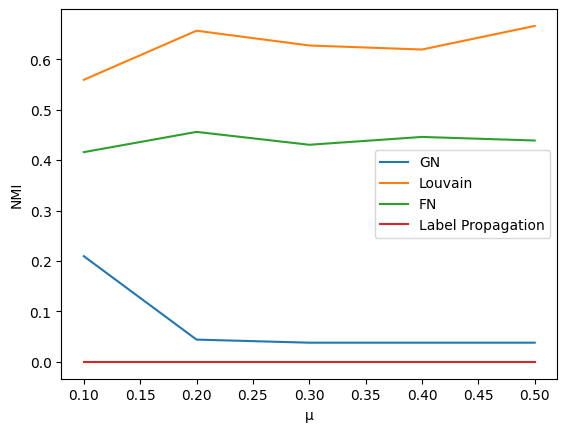

In [29]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *

import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import LabelBinarizer

from networkx.generators.community import LFR_benchmark_graph
n = 250
tau1 = 3
tau2 = 1.5
mu = linspace(0.1, 0.5, 5)
# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
for m in mu:
    G = LFR_benchmark_graph(
    n, tau1, tau2, m, average_degree=5, min_community=20, seed = 10
)
    print(f"生成了一个μ为{m}的网络")
    # GN算法
    gn_partition = girvan_newman(G)
    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}

    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    gn_communities = community.best_partition(G, resolution = 1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    lp_partition = list(lpa(G))
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()]
    nmi_lp.append(normalized_mutual_info_score(list(nx.get_node_attributes(G, 'community').values()), lp_labels_pred))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN')
plt.plot(mu, nmi_louvain, label='Louvain')
plt.plot(mu, nmi_fn, label='FN')
plt.plot(mu, nmi_lp, label='Label Propagation')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

In [15]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import LabelBinarizer

from networkx.generators.community import LFR_benchmark_graph
n = 1000
mu = linspace(0, 1, 11)
# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
for m in mu:
    # 生成 LFR 网络
    G = nx.generators.community.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10)

    # GN算法
    gn_partition = girvan_newman(G)
    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}

    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    gn_communities = community.best_partition(G, resolution = 1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    lp_partition = list(lpa(G))
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()]
    nmi_lp.append(normalized_mutual_info_score(list(nx.get_node_attributes(G, 'community').values()), lp_labels_pred))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN')
plt.plot(mu, nmi_louvain, label='Louvain')
plt.plot(mu, nmi_fn, label='FN')
plt.plot(mu, nmi_lp, label='Label Propagation')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

ExceededMaxIterations: Could not assign communities; try increasing min_community

In [17]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *

import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge
from community import community_louvain
from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score

from networkx.generators.community import LFR_benchmark_graph
n = 250
mu = linspace(0, 1, 11)
# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
for m in mu:
    G = LFR_benchmark_graph(
    n, 3, 1.5, mu=m, average_degree=15, min_community=30, max_community=50, max_degree=50
)
    print(f"生成了一个μ为{m}的网络")
    # GN算法
    gn_partition = girvan_newman(G)
    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}

    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    gn_communities = community.best_partition(G, resolution = 1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    lp_partition = list(lpa(G))
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()]
    nmi_lp.append(normalized_mutual_info_score(list(nx.get_node_attributes(G, 'community').values()), lp_labels_pred))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN')
plt.plot(mu, nmi_louvain, label='Louvain')
plt.plot(mu, nmi_fn, label='FN')
plt.plot(mu, nmi_lp, label='Label Propagation')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

ExceededMaxIterations: Could not assign communities; try increasing min_community

生成了一个μ为0的网络
已经添加节点社区标签
[{64, 1, 99, 37, 102, 143, 117, 54, 55, 30}, {33, 2, 42, 75, 78, 83, 60}, {3, 132, 131, 5, 6, 136, 9, 139, 141, 142, 15, 150, 23, 154, 155, 29, 157, 163, 39, 167, 169, 170, 45, 173, 51, 52, 53, 185, 197, 199, 73, 205, 209, 214, 216, 219, 95, 224, 98, 101, 230, 231, 104, 232, 106, 234, 235, 236, 249, 242, 243, 244, 245, 246, 247, 248, 121, 250, 127}, {4, 10, 16, 148, 36, 43, 172, 175, 48, 181, 61, 192, 66, 201, 208, 81, 84, 213, 221, 228, 229, 114, 118}, {133, 7, 76, 80, 18, 20, 21, 93, 31}, {129, 8, 137, 19, 153, 158, 161, 176, 177, 186, 62, 198, 74, 204, 82, 218, 91, 222, 223, 226, 227, 233, 107, 237, 238, 239, 240, 241, 115}, {162, 67, 34, 68, 69, 41, 11, 140, 28, 14, 46, 144, 116, 85, 59, 156}, {135, 12, 146, 151, 25, 26, 27, 35, 164, 165, 166, 47, 183, 184, 193, 202, 206, 217, 90, 92, 122}, {96, 128, 194, 72, 105, 13, 77, 79, 207, 145, 210, 212, 182, 87, 63, 191}, {138, 17, 168, 171, 174, 179, 180, 189, 190, 70, 200, 211, 215, 88, 89, 220, 94, 225, 112, 120, 

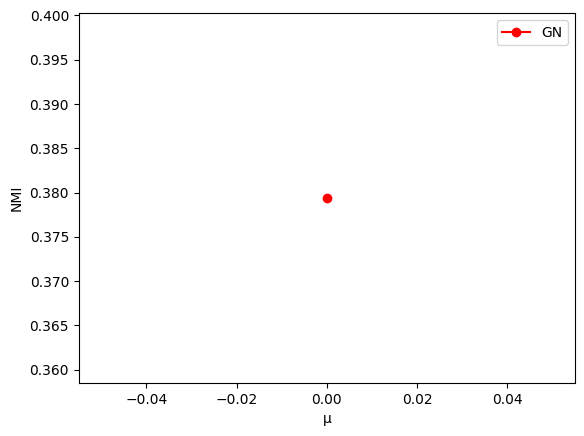

In [56]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *
from networkx.algorithms.community import asyn_lpa_communities as lpa
import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score

# def lpa(G):
#     labels = {}
#     for n in G.nodes():
#         neighbor_labels = [G.nodes[m]['label'] for m in G.neighbors(n)]
#         label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
#         labels[n] = np.argmax(label_count)
#     while True:
#         # 将每个节点的标签设置为其大多数邻居的标签
#         for n in G.nodes():
#             neighbor_labels = [labels[m] for m in G.neighbors(n)]
#             label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
#             labels[n] = np.argmax(label_count)
#         # 如果每个节点的标签都与其大多数邻居的标签相同，则停止
#         if len(set(labels.values())) == len(set(nx.get_node_attributes(G, 'label').values())):
#             return list(labels.values())
    
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
mu = linspace(0, 1, 11)
mu = [0]
for m in mu:
    subdir = "{:.1f}".format(m)
    filepath = r"data μ={}\network.dat".format(subdir)
    G = nx.read_edgelist(filepath, nodetype=int)
    print(f"生成了一个μ为{m}的网络")
        
    subdir = "{:.1f}".format(m)
    filepath = r"data μ={}\community.dat".format(subdir)
    # 读取 community.dat 文件
    with open(filepath, 'r') as f:
        lines = f.readlines()

    # 将每行数据分割成节点和社区两部分，并转换为整数类型
    node2community = {}
    for line in lines:
        node, community = line.strip().split('\t')
        node = int(node)
        community = int(community)
        node2community[node] = community

    # 向图中添加节点，并为每个节点设置 'community' 属性
    nx.set_node_attributes(G, node2community, name='community')
    print("已经添加节点社区标签")
    # GN算法
    gn_partition = girvan_newman(G)

    gn_partition = list(gn_partition)
    print(gn_partition)
    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}
    # print(gn_community_dict)
    # print(len(true_community_dict), len(gn_community_dict))  # 打印一下这两个变量的长度
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # # Louvain算法
    # from community import community_louvain
    # gn_communities = community_louvain.best_partition(G, resolution=1)
    # # 将每个节点的社区信息存储为一个字典
    # gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # # 将每个节点的真实社区信息存储为一个字典
    # true_community_dict = nx.get_node_attributes(G, 'community')
    # # 计算 NMI
    # nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # # FN算法
    # partition = community_louvain.best_partition(G)
    # nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # # 初始化节点标签和权重
    # for n in G.nodes():
    #     G.nodes[n]['label'] = n
    #     G.nodes[n]['weight'] = 1.0 / len(G)
    # lp_partition = list(lpa(G)) # 使用标签传播算法，对网络进行社区检测。
    # print(lp_partition)
    # dct = {}
    # for i, s in enumerate(lp_partition):
    #     dct[i+1] = len(s)
    # lp_partition = dct
    # print(lp_partition)
    # lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()] # 存储每个节点所属的社区标签，并将无法被划分的节点标记为-1。
    # # print(lp_labels_pred)
    # print(list(nx.get_node_attributes(G, 'community').values()))
    # # 将预测结果和真实结果进行比较，计算归一化互信息得分。
    # nmi_lp.append(normalized_mutual_info_score(lp_labels_pred, list(nx.get_node_attributes(G, 'community').values())))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN', marker='o', color='red')
# plt.plot(mu, nmi_louvain, label='Louvain', marker='o', color='blue')
# plt.plot(mu, nmi_fn, label='FN', marker='o', color='black')
# plt.plot(mu, nmi_lp, label='Label Propagation', marker='o', color='pink')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

In [33]:
# 社区划分字典
community_dict = {64: 0, 1: 0, 99: 0, 37: 0, 102: 0, 143: 0, 117: 0, 54: 0, 55: 0, 30: 0, 33: 1, 2: 1, 42: 1, 75: 1, 78: 1, 83: 1, 60: 1, 3: 2, 132: 2, 131: 2, 5: 2, 6: 2, 136: 2, 9: 2, 139: 2, 141: 2, 142: 2, 15: 2, 150: 2, 23: 2, 154: 2, 155: 2, 29: 2, 157: 2, 163: 2, 39: 2, 167: 2, 169: 2, 170: 2, 45: 2, 173: 2, 51: 2, 52: 2, 53: 2, 185: 2, 197: 2, 199: 2, 73: 2, 205: 2, 209: 2, 214: 2, 216: 2, 219: 2, 95: 2, 224: 2, 98: 2, 101: 2, 230: 2, 231: 2, 104: 2, 232: 2, 106: 2, 234: 2, 235: 2, 236: 2, 249: 2, 242: 2, 243: 2, 244: 2, 245: 2, 246: 2, 247: 2, 248: 2, 121: 2, 250: 2, 127: 2, 4: 3, 10: 3, 16: 3, 148: 3, 36: 3, 43: 3, 172: 3, 175: 3, 48: 3, 181: 3, 61: 3, 192: 3, 66: 3, 201: 3, 208: 3, 81: 3, 84: 3, 213: 3, 221: 3, 228: 3, 229: 3, 114: 3, 118: 3, 133: 4, 7: 4, 76: 4, 80: 4, 18: 4, 20: 4, 21: 4, 93: 4, 31: 4, 129: 5, 8: 5, 137: 5, 19: 5, 153: 5, 158: 5, 161: 5, 176: 5, 177: 5, 186: 5, 62: 5, 198: 5, 74: 5, 204: 5, 82: 5, 218: 5, 91: 5, 222: 5, 223: 5, 226: 5, 227: 5, 233: 5, 107: 5, 237: 5, 238: 5, 239: 5, 240: 5, 241: 5, 115: 5, 162: 6, 67: 6, 34: 6, 68: 6, 69: 6, 41: 6, 11: 6, 140: 6, 28: 6, 14: 6, 46: 6, 144: 6, 116: 6, 85: 6, 59: 6, 156: 6, 135: 7, 12: 7, 146: 7, 151: 7, 25: 7, 26: 7, 27: 7, 35: 7, 164: 7, 165: 7, 166: 7, 47: 7, 183: 7, 184: 7, 193: 7, 202: 7, 206: 7, 217: 7, 90: 7, 92: 7, 122: 7, 96: 8, 128: 8, 194: 8, 72: 8, 105: 8, 13: 8, 77: 8, 79: 8, 207: 8, 145: 8, 210: 8, 212: 8, 182: 8, 87: 8, 63: 8, 191: 8, 138: 9, 17: 9, 168: 9, 171: 9, 174: 9, 179: 9, 180: 9, 189: 9, 190: 9, 70: 9, 200: 9, 211: 9, 215: 9, 88: 9, 89: 9, 220: 9, 94: 9, 225: 9, 112: 9, 120: 9, 123: 9, 125: 9, 32: 10, 65: 10, 195: 10, 196: 10, 134: 10, 71: 10, 38: 10, 203: 10, 108: 10, 110: 10, 22: 10, 86: 10, 152: 10, 57: 10, 58: 10, 126: 10, 159: 10, 160: 11, 130: 11, 103: 11, 40: 11, 109: 11, 113: 11, 178: 11, 149: 11, 24: 11, 56: 11, 187: 11, 188: 11, 97: 12, 100: 12, 44: 12, 111: 12, 49: 12, 50: 12, 147: 12, 119: 12, 124: 12}

# 按照节点序号对字典进行排序
sorted_community_dict = sorted(community_dict.items())

# 输出结果
for node, community in sorted_community_dict:
    print(f"{node}\t{community}")


1	0
2	1
3	2
4	3
5	2
6	2
7	4
8	5
9	2
10	3
11	6
12	7
13	8
14	6
15	2
16	3
17	9
18	4
19	5
20	4
21	4
22	10
23	2
24	11
25	7
26	7
27	7
28	6
29	2
30	0
31	4
32	10
33	1
34	6
35	7
36	3
37	0
38	10
39	2
40	11
41	6
42	1
43	3
44	12
45	2
46	6
47	7
48	3
49	12
50	12
51	2
52	2
53	2
54	0
55	0
56	11
57	10
58	10
59	6
60	1
61	3
62	5
63	8
64	0
65	10
66	3
67	6
68	6
69	6
70	9
71	10
72	8
73	2
74	5
75	1
76	4
77	8
78	1
79	8
80	4
81	3
82	5
83	1
84	3
85	6
86	10
87	8
88	9
89	9
90	7
91	5
92	7
93	4
94	9
95	2
96	8
97	12
98	2
99	0
100	12
101	2
102	0
103	11
104	2
105	8
106	2
107	5
108	10
109	11
110	10
111	12
112	9
113	11
114	3
115	5
116	6
117	0
118	3
119	12
120	9
121	2
122	7
123	9
124	12
125	9
126	10
127	2
128	8
129	5
130	11
131	2
132	2
133	4
134	10
135	7
136	2
137	5
138	9
139	2
140	6
141	2
142	2
143	0
144	6
145	8
146	7
147	12
148	3
149	11
150	2
151	7
152	10
153	5
154	2
155	2
156	6
157	2
158	5
159	10
160	11
161	5
162	6
163	2
164	7
165	7
166	7
167	2
168	9
169	2
170	2
171	9
172	3
173	2
174	9
175	3
176	5
177	5
178	11
179	9
1

**第四题C语言生成LFR**

生成了一个μ为0.0的网络
已经添加节点社区标签
{64: 0, 1: 0, 99: 0, 37: 0, 102: 0, 143: 0, 117: 0, 54: 0, 55: 0, 30: 0, 33: 1, 2: 1, 42: 1, 75: 1, 78: 1, 83: 1, 60: 1, 3: 2, 132: 2, 131: 2, 5: 2, 6: 2, 136: 2, 9: 2, 139: 2, 141: 2, 142: 2, 15: 2, 150: 2, 23: 2, 154: 2, 155: 2, 29: 2, 157: 2, 163: 2, 39: 2, 167: 2, 169: 2, 170: 2, 45: 2, 173: 2, 51: 2, 52: 2, 53: 2, 185: 2, 197: 2, 199: 2, 73: 2, 205: 2, 209: 2, 214: 2, 216: 2, 219: 2, 95: 2, 224: 2, 98: 2, 101: 2, 230: 2, 231: 2, 104: 2, 232: 2, 106: 2, 234: 2, 235: 2, 236: 2, 249: 2, 242: 2, 243: 2, 244: 2, 245: 2, 246: 2, 247: 2, 248: 2, 121: 2, 250: 2, 127: 2, 4: 3, 10: 3, 16: 3, 148: 3, 36: 3, 43: 3, 172: 3, 175: 3, 48: 3, 181: 3, 61: 3, 192: 3, 66: 3, 201: 3, 208: 3, 81: 3, 84: 3, 213: 3, 221: 3, 228: 3, 229: 3, 114: 3, 118: 3, 133: 4, 7: 4, 76: 4, 80: 4, 18: 4, 20: 4, 21: 4, 93: 4, 31: 4, 129: 5, 8: 5, 137: 5, 19: 5, 153: 5, 158: 5, 161: 5, 176: 5, 177: 5, 186: 5, 62: 5, 198: 5, 74: 5, 204: 5, 82: 5, 218: 5, 91: 5, 222: 5, 223: 5, 226: 5, 227: 5, 233:

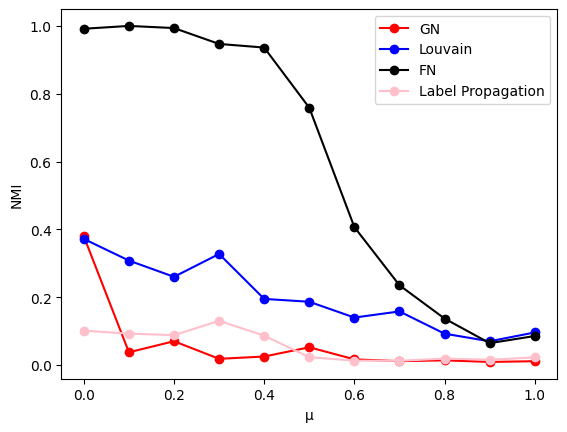

In [34]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *
from networkx.algorithms.community import asyn_lpa_communities as lpa
import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score

# def lpa(G):
#     labels = {}
#     for n in G.nodes():
#         neighbor_labels = [G.nodes[m]['label'] for m in G.neighbors(n)]
#         label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
#         labels[n] = np.argmax(label_count)
#     while True:
#         # 将每个节点的标签设置为其大多数邻居的标签
#         for n in G.nodes():
#             neighbor_labels = [labels[m] for m in G.neighbors(n)]
#             label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
#             labels[n] = np.argmax(label_count)
#         # 如果每个节点的标签都与其大多数邻居的标签相同，则停止
#         if len(set(labels.values())) == len(set(nx.get_node_attributes(G, 'label').values())):
#             return list(labels.values())
    
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
mu = linspace(0, 1, 11)
for m in mu:
    subdir = "{:.1f}".format(m)
    filepath = r"data μ={}\network.dat".format(subdir)
    G = nx.read_edgelist(filepath, nodetype=int)
    print(f"生成了一个μ为{m}的网络")
        
    subdir = "{:.1f}".format(m)
    filepath = r"data μ={}\community.dat".format(subdir)
    # 读取 community.dat 文件
    with open(filepath, 'r') as f:
        lines = f.readlines()

    # 将每行数据分割成节点和社区两部分，并转换为整数类型
    node2community = {}
    for line in lines:
        node, community = line.strip().split('\t')
        node = int(node)
        community = int(community)
        node2community[node] = community

    # 向图中添加节点，并为每个节点设置 'community' 属性
    nx.set_node_attributes(G, node2community, name='community')
    print("已经添加节点社区标签")
    # GN算法
    gn_partition = girvan_newman(G)
    gn_partition = list(gn_partition)

    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}
    print(gn_community_dict)
    # print(len(true_community_dict), len(gn_community_dict))  # 打印一下这两个变量的长度
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    from community import community_louvain
    gn_communities = community_louvain.best_partition(G, resolution=1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法                                 
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 初始化节点标签和权重
    for n in G.nodes():
        G.nodes[n]['label'] = n
        G.nodes[n]['weight'] = 1.0 / len(G)
    lp_partition = list(lpa(G)) # 使用标签传播算法，对网络进行社区检测。
    print(lp_partition)
    dct = {}
    for i, s in enumerate(lp_partition):
        dct[i+1] = len(s)
    lp_partition = dct
    print(lp_partition)
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()] # 存储每个节点所属的社区标签，并将无法被划分的节点标记为-1。
    # print(lp_labels_pred)
    print(list(nx.get_node_attributes(G, 'community').values()))
    # 将预测结果和真实结果进行比较，计算归一化互信息得分。
    nmi_lp.append(normalized_mutual_info_score(lp_labels_pred, list(nx.get_node_attributes(G, 'community').values())))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN', marker='o', color='red')
plt.plot(mu, nmi_louvain, label='Louvain', marker='o', color='blue')
plt.plot(mu, nmi_fn, label='FN', marker='o', color='black')
plt.plot(mu, nmi_lp, label='Label Propagation', marker='o', color='pink')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

In [20]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *
from networkx.algorithms.community import asyn_lpa_communities as lpa
import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score

def genrate_lfr_graph(mu):
    params = {"size":250, "tau1":2, "tau2":1.1, "mu":mu, "min_degree":20, "max_degree":50}

    G = nx.generators.community.LFR_benchmark_graph(params["size"], params["tau1"], params["tau2"], params["mu"], 
                        min_degree=params["min_degree"],
                        max_degree=params["max_degree"],
                        max_iters=5000, seed = 10,
                        )
    print("Generation Completed")
    return G  

# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
n = 250
tau1 = 3
tau2 = 1.5
mu = linspace(0, 1, 11)
for m in mu:

    # 生成 LFR 网络
    G = genrate_lfr_graph(mu=m)     
    print("LFR network generated")
    # GN算法
    gn_partition = girvan_newman(G)
    gn_partition = list(gn_partition)

    gn_communities = [list(i) for i in gn_partition]
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}
    print(gn_community_dict)
    # print(len(true_community_dict), len(gn_community_dict))  # 打印一下这两个变量的长度
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # Louvain算法
    from community import community_louvain
    gn_communities = community_louvain.best_partition(G, resolution=1)
    # 将每个节点的社区信息存储为一个字典
    gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # 将每个节点的真实社区信息存储为一个字典
    true_community_dict = nx.get_node_attributes(G, 'community')
    # 计算 NMI
    nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # FN算法
    partition = community_louvain.best_partition(G)
    nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    # 初始化节点标签
    # 初始化节点标签和权重
    # for n in G.nodes():
    #     G.nodes[n]['label'] = n
    #     G.nodes[n]['weight'] = 1.0 / len(G)
    # lp_partition = list(lpa(G)) # 使用标签传播算法，对网络进行社区检测。
    # print(lp_partition)
    # dct = {}
    # for i, s in enumerate(lp_partition):
    #     dct[i+1] = len(s)
    # lp_partition = dct
    # print(lp_partition)
    # lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()] # 存储每个节点所属的社区标签，并将无法被划分的节点标记为-1。
    # # print(lp_labels_pred)
    # print(list(nx.get_node_attributes(G, 'community').values()))
    # # 将预测结果和真实结果进行比较，计算归一化互信息得分。
    # nmi_lp.append(normalized_mutual_info_score(lp_labels_pred, list(nx.get_node_attributes(G, 'community').values())))
# 绘制图表
plt.plot(mu, nmi_gn, label='GN', marker='o', color='red')
plt.plot(mu, nmi_louvain, label='Louvain', marker='o', color='blue')
plt.plot(mu, nmi_fn, label='FN', marker='o', color='black')
# plt.plot(mu, nmi_lp, label='Label Propagation', marker='o', color='pink')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

ExceededMaxIterations: Could not assign communities; try increasing min_community

生成了一个μ为0.0的网络
已经添加节点社区标签
[{64, 1, 99, 37, 102, 143, 117, 54, 55, 30}, {33, 2, 42, 75, 78, 83, 60}, {98, 3, 132, 5, 131, 39, 170, 141, 205, 51, 53, 150, 23, 121, 155, 29}, {4, 10, 16, 148, 36, 43, 172, 175, 48, 181, 61, 192, 66, 201, 208, 81, 84, 213, 221, 228, 229, 114, 118}, {6, 136, 9, 139, 142, 15, 154, 157, 163, 167, 169, 45, 173, 52, 185, 197, 199, 73, 209, 214, 216, 219, 95, 224, 101, 230, 231, 104, 232, 234, 106, 236, 235, 242, 243, 244, 245, 246, 247, 248, 249, 250, 127}, {133, 7, 76, 80, 18, 20, 21, 93, 31}, {129, 8, 137, 19, 153, 158, 161, 176, 177, 186, 62, 198, 74, 204, 82, 218, 91, 222, 223, 226, 227, 233, 107, 237, 238, 239, 240, 241, 115}, {162, 67, 11, 140, 28, 14, 144, 116, 59, 156}, {135, 12, 146, 151, 25, 26, 27, 35, 164, 165, 166, 47, 183, 184, 193, 202, 206, 217, 90, 92, 122}, {128, 96, 194, 72, 105, 13, 77, 207, 79, 145, 210, 212, 182, 87, 63, 191}, {34, 68, 69, 41, 46, 85}, {138, 17, 168, 171, 174, 179, 180, 189, 190, 70, 200, 211, 215, 88, 89, 220, 94, 225, 112,

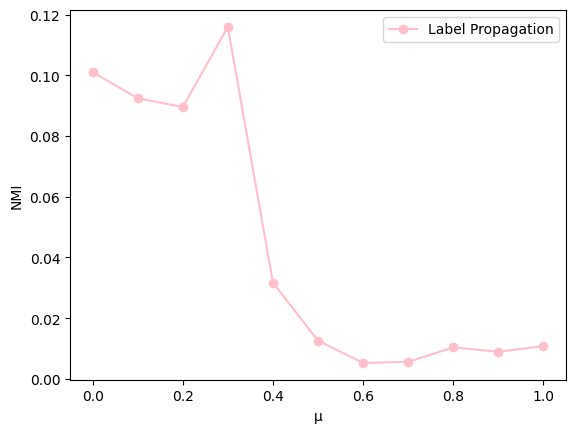

In [7]:
import networkx as nx
import community # louvain算法包
from communities.algorithms import *
from networkx.algorithms.community import asyn_lpa_communities as lpa
import matplotlib.pyplot as plt
from numpy import linspace
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

from networkx.algorithms.community import asyn_lpa_communities as lpa
import networkx as nx
from sklearn.metrics.cluster import normalized_mutual_info_score

# def lpa(G):
#     labels = {}
#     for n in G.nodes():
#         neighbor_labels = [G.nodes[m]['label'] for m in G.neighbors(n)]
#         label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
#         labels[n] = np.argmax(label_count)
#     while True:
#         # 将每个节点的标签设置为其大多数邻居的标签
#         for n in G.nodes():
#             neighbor_labels = [labels[m] for m in G.neighbors(n)]
#             label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
#             labels[n] = np.argmax(label_count)
#         # 如果每个节点的标签都与其大多数邻居的标签相同，则停止
#         if len(set(labels.values())) == len(set(nx.get_node_attributes(G, 'label').values())):
#             return list(labels.values())
      
# 循环计算NMI值
nmi_gn = []
nmi_louvain = []
nmi_fn = []
nmi_lp = []
mu = linspace(0, 1, 11)
for m in mu:
    subdir = "{:.1f}".format(m)
    filepath = r"data μ={}\network.dat".format(subdir)
    G = nx.read_edgelist(filepath, nodetype=int)
    print(f"生成了一个μ为{m}的网络")
        
    subdir = "{:.1f}".format(m)
    filepath = r"data μ={}\community.dat".format(subdir)
    # 读取 community.dat 文件
    with open(filepath, 'r') as f:
        lines = f.readlines()

    # 将每行数据分割成节点和社区两部分，并转换为整数类型
    node2community = {}
    for line in lines:
        node, community = line.strip().split('\t')
        node = int(node)
        community = int(community)
        node2community[node] = community

    # 向图中添加节点，并为每个节点设置 'community' 属性
    nx.set_node_attributes(G, node2community, name='community')
    print("已经添加节点社区标签")
    # # GN算法
    # gn_partition = girvan_newman(G)
    # gn_partition = list(gn_partition)

    # gn_communities = [list(i) for i in gn_partition]
    # # 将每个节点的社区信息存储为一个字典
    # gn_community_dict = {node: i for i, community in enumerate(gn_communities) for node in community}
    # # print(len(true_community_dict), len(gn_community_dict))  # 打印一下这两个变量的长度
    # # 将每个节点的真实社区信息存储为一个字典
    # true_community_dict = nx.get_node_attributes(G, 'community')
    # # 计算 NMI
    # nmi_gn.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # # Louvain算法
    # from community import community_louvain
    # gn_communities = community_louvain.best_partition(G, resolution=1)
    # # 将每个节点的社区信息存储为一个字典
    # gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}
    # # 将每个节点的真实社区信息存储为一个字典
    # true_community_dict = nx.get_node_attributes(G, 'community')
    # # 计算 NMI
    # nmi_louvain.append(normalized_mutual_info_score(list(true_community_dict.values()), list(gn_community_dict.values())))

    # # FN算法
    # partition = community_louvain.best_partition(G)
    # nmi_fn.append(normalized_mutual_info_score(list(partition.values()), list(nx.get_node_attributes(G, 'community').values())))
    
    # 标签传播算法
    # 初始化节点标签
    # 初始化节点标签和权重
    # for n in G.nodes():
    #     G.nodes[n]['label'] = n
    #     G.nodes[n]['weight'] = 1.0 / len(G)
    lp_partition = list(lpa(G)) # 使用标签传播算法，对网络进行社区检测。
    print(lp_partition)
    dct = {}
    for i, s in enumerate(lp_partition):
        dct[i+1] = len(s)
    lp_partition = dct
    print(lp_partition)
    lp_labels_pred = [lp_partition[node] if node in lp_partition else -1 for node in G.nodes()] # 存储每个节点所属的社区标签，并将无法被划分的节点标记为-1。
    # print(lp_labels_pred)
    print(list(nx.get_node_attributes(G, 'community').values()))
    # 将预测结果和真实结果进行比较，计算归一化互信息得分。
    nmi_lp.append(normalized_mutual_info_score(lp_labels_pred, list(nx.get_node_attributes(G, 'community').values())))
# 绘制图表
# plt.plot(mu, nmi_gn, label='GN', marker='o', color='red')
# plt.plot(mu, nmi_louvain, label='Louvain', marker='o', color='blue')
# plt.plot(mu, nmi_fn, label='FN', marker='o', color='black')
plt.plot(mu, nmi_lp, label='Label Propagation', marker='o', color='pink')
plt.xlabel('μ')
plt.ylabel('NMI')
plt.legend()
plt.show()

In [8]:
communities = [{64, 1, 99, 37, 102, 143, 117, 54, 55, 30}, {33, 2, 42, 75, 78, 83, 60}, {98, 3, 132, 5, 131, 39, 170, 141, 205, 51, 53, 150, 23, 121, 155, 29}, {4, 10, 16, 148, 36, 43, 172, 175, 48, 181, 61, 192, 66, 201, 208, 81, 84, 213, 221, 228, 229, 114, 118}, {6, 136, 9, 139, 142, 15, 154, 157, 163, 167, 169, 45, 173, 52, 185, 197, 199, 73, 209, 214, 216, 219, 95, 224, 101, 230, 231, 104, 232, 234, 106, 236, 235, 242, 243, 244, 245, 246, 247, 248, 249, 250, 127}, {133, 7, 76, 80, 18, 20, 21, 93, 31}, {129, 8, 137, 19, 153, 158, 161, 176, 177, 186, 62, 198, 74, 204, 82, 218, 91, 222, 223, 226, 227, 233, 107, 237, 238, 239, 240, 241, 115}, {162, 67, 11, 140, 28, 14, 144, 116, 59, 156}, {135, 12, 146, 151, 25, 26, 27, 35, 164, 165, 166, 47, 183, 184, 193, 202, 206, 217, 90, 92, 122}, {128, 96, 194, 72, 105, 13, 77, 207, 79, 145, 210, 212, 182, 87, 63, 191}, {34, 68, 69, 41, 46, 85}, {138, 17, 168, 171, 174, 179, 180, 189, 190, 70, 200, 211, 215, 88, 89, 220, 94, 225, 112, 120, 123, 125}, {32, 65, 195, 196, 134, 38, 71, 203, 108, 110, 22, 86, 152, 57, 58, 126, 159}, {160, 130, 103, 40, 109, 113, 178, 149, 24, 56, 187, 188}, {97, 100, 44, 111, 49, 50, 147, 119, 124}]
result_dict = {}
community_idx = 1
for community in communities:
    for node in community:
        result_dict[node] = community_idx
    community_idx += 1

# 对于未被划分到社团中的节点，将其所属社团序号设为 - 1
for node_idx in range(1, len(communities) * len(communities[0]) + 1):
    if node_idx not in result_dict:
        result_dict[node_idx] = -1

# 输出字典形式的社团划分结果
for node_idx, community_idx in result_dict.items():
    print(node_idx, community_idx)

64 1
1 1
99 1
37 1
102 1
143 1
117 1
54 1
55 1
30 1
33 2
2 2
83 2
42 2
75 2
60 2
78 2
3 3
131 3
132 3
5 3
141 3
205 3
150 3
23 3
155 3
29 3
98 3
39 3
170 3
51 3
53 3
121 3
192 4
66 4
4 4
201 4
10 4
16 4
208 4
81 4
148 4
84 4
213 4
221 4
36 4
228 4
229 4
43 4
172 4
175 4
48 4
114 4
181 4
118 4
61 4
6 5
136 5
9 5
139 5
142 5
15 5
154 5
157 5
163 5
167 5
169 5
45 5
173 5
52 5
185 5
197 5
199 5
73 5
209 5
214 5
216 5
219 5
95 5
224 5
101 5
230 5
231 5
104 5
232 5
234 5
106 5
236 5
235 5
242 5
243 5
244 5
245 5
246 5
247 5
248 5
249 5
250 5
127 5
133 6
7 6
76 6
80 6
18 6
20 6
21 6
93 6
31 6
129 7
198 7
8 7
137 7
74 7
204 7
82 7
19 7
153 7
218 7
91 7
158 7
222 7
223 7
161 7
226 7
227 7
233 7
107 7
237 7
238 7
239 7
176 7
177 7
240 7
241 7
115 7
186 7
62 7
162 8
67 8
11 8
140 8
28 8
14 8
144 8
116 8
59 8
156 8
193 9
135 9
202 9
12 9
206 9
146 9
151 9
25 9
26 9
27 9
217 9
90 9
92 9
35 9
164 9
165 9
166 9
47 9
183 9
184 9
122 9
128 10
191 10
194 10
72 10
13 10
77 10
207 10
79 10
145 10
210 10
2

In [5]:
import networkx as nx
import numpy as np

# # 构造图
# G = nx.karate_club_graph()
# mu = linspace(0, 1, 11)
mu = 0.1
subdir = "{:.1f}".format(mu)
filepath = r"data μ={}\network.dat".format(subdir)
G = nx.read_edgelist(filepath, nodetype=int)
# 初始化节点标签和权重
for n in G.nodes():
    G.nodes[n]['label'] = n
    G.nodes[n]['weight'] = 1.0 / len(G)

# 改进版本的LPA算法
def lpa(G):
    # 迭代计算每个节点的标签
    while True:
        labels = {}
        for n in G.nodes():
            neighbor_labels = [G.nodes[m]['label'] for m in G.neighbors(n)]
            label_count = np.bincount(neighbor_labels, weights=[G.nodes[m]['weight'] for m in G.neighbors(n)])
            labels[n] = np.argmax(label_count)
        
        # 如果所有节点的标签都没有变化，则停止迭代
        if all([labels[n] == G.nodes[n]['label'] for n in G.nodes()]):
            break
        
        # 更新节点权重和标签
        for n, label in labels.items():
            G.nodes[n]['label'] = label
            G.nodes[n]['weight'] = np.sum([G.nodes[m]['weight'] for m in G.neighbors(n) if G.nodes[m]['label'] == label])
    
    # 输出结果
    for n in G.nodes():
        print('Node %d: label=%d' % (n, G.nodes[n]['label']))
lpa(G)

Node 1: label=104
Node 109: label=104
Node 203: label=104
Node 222: label=104
Node 230: label=104
Node 2: label=104
Node 232: label=104
Node 237: label=104
Node 240: label=104
Node 241: label=104
Node 3: label=104
Node 246: label=104
Node 247: label=104
Node 249: label=104
Node 250: label=104
Node 4: label=104
Node 245: label=104
Node 5: label=104
Node 166: label=104
Node 196: label=104
Node 197: label=104
Node 205: label=104
Node 6: label=104
Node 44: label=104
Node 80: label=104
Node 125: label=104
Node 140: label=104
Node 7: label=104
Node 8: label=104
Node 195: label=104
Node 233: label=104
Node 235: label=104
Node 243: label=104
Node 9: label=104
Node 228: label=104
Node 10: label=104
Node 69: label=104
Node 151: label=104
Node 179: label=104
Node 191: label=104
Node 11: label=104
Node 236: label=104
Node 12: label=104
Node 101: label=104
Node 147: label=104
Node 150: label=104
Node 153: label=104
Node 13: label=104
Node 50: label=104
Node 61: label=104
Node 68: label=104
Node 124

In [4]:
import networkx as nx

# 创建一个无向图对象
G = nx.Graph()

# 向图中添加节点
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# 向图中添加边
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)])

# 使用Louvain算法将节点分成若干社区
from community import community_louvain
gn_communities = community_louvain.best_partition(G, resolution=1)

# 将每个节点的社区信息存储为一个字典
gn_community_dict = {node: i for i, community in enumerate(set(gn_communities.values())) for node, comm in gn_communities.items() if comm == community}


In [27]:
import networkx as nx
# newman 快速算法


# 合并社团函数
def cluAssemble(self, other, currentCluList):
    currentCluList.remove(self)
    currentCluList.remove(other)
    for node in self:
        if node not in other:
            other.append(node)
    currentCluList.append(other)
    cluAfterAssemble = currentCluList
    return cluAfterAssemble


# 判断两个社团之间是否有边相连
def cluHasEdge(clu1, clu2, graph):
    for p1 in clu1:
        for p2 in clu2:
            if graph.has_edge(p1, p2):
                return True
    return False


# 从 path 中读取图
def load_graph(path):
    G = nx.Graph()
    with open(path) as text:
        for line in text:
            vertices = line.strip().split()[:2]
            sourcePoint = int(vertices[0])
            targetPoint = int(vertices[1])
            G.add_edge(sourcePoint, targetPoint)
    return G


# 计时器函数，该函数是一个装饰器 decorator
def fn_timer(function):
    @wraps(function)
    def function_timer(*args, **kwargs):
        t0 = time.time()
        result = function(*args, **kwargs)
        t1 = time.time()
        print("time:%s s" % (str(t1 - t0)))
        return result
    return function_timer
    
    
# 写入所属社团标号
def writeClu(G, currentCluList):
    cluID = 0
    for item in currentCluList:
        cluID += 1
        for item2 in item:
            G.nodes[item2]['groupID'] = str(cluID)
    # print(G.nodes(data=True))
    
    
# Q = 社团内部边数 / 网络总边数 - （社团内所有点度数之和 / 2 倍总边数）平方
def cal_Q(partition, G):
    m = len(G.edges())
    a = 0.0
    e = 0.0

    # 计算 eii
    for community in partition:
        eii = 0.0
        for i in community:
            for j in community:
                if G.has_edge(i, j):
                    eii += 1
        e += eii / (2 * m)
    # 计算 aij 的平方
    for community in partition:
        aij = 0.0
        for node in community:
            aij += len(list((G.neighbors(node))))
        a += (aij / (2 * m)) ** 2

    q = e - a
    return q


# 主类
class newmanFast:
    def __init__(self, graph):
        self.G = graph
        self.nodeList = self.G.nodes()
        self.cluList = []
        for i in self.nodeList:
            self.cluList.append([i])
        self.finalClu = []

    @fn_timer
    def execute(self):
        iterTime = 1
        # 先将每个节点看作一个社区，然后选择模块度增值最大的进行合并，直到所有社团变成一个社团为止
        print(self.cluList)
        maxQ = -float('Inf')
        # 只要社团列表长度不为 1
        while len(self.cluList) != 1:
            Q = -float('Inf')
            for cluFrom in self.cluList:
                thisClu = self.cluList.copy()
                thisClu.remove(cluFrom)
                for cluTo in thisClu:
                    if cluHasEdge(cluFrom, cluTo, self.G):
                        partition = cluAssemble(cluFrom.copy(), cluTo.copy(), self.cluList.copy())
                        thisQ = cal_Q(partition, self.G)
                        # print ("社团" + str (cluTo) + "q 值" + str (thisQ))
                        # 记录该轮最大 Q 和目标社团
                        if thisQ >= Q:
                            Q = thisQ
                            finalCluFrom = cluFrom
                            finalCluTo = cluTo
            cluAssemble(finalCluFrom.copy(), finalCluTo.copy(), self.cluList)
            print("该轮结束的划分结果:" + str(self.cluList))
            print("该轮结束时的模块度 Q:" + str(Q))
            print("################ 第" + str(iterTime) + "轮结束 ##################")
            file_object = open('%sres.txt' % str(graphName), 'a')
            file_object.write(str(iterTime) + '|Q:' + str(Q) + '|Result:' + str(self.cluList) + '\n')
            file_object.close()

            iterTime += 1
            if Q > maxQ:
                maxQ = Q
                iterRound = iterTime - 1
                self.finalClu = self.cluList.copy()
                writeClu(self.G, self.cluList)

        print("最大 Q 值出现在：第" + str(iterRound) + "轮。最大 Q 值为：" + str(maxQ))
        for clu in self.finalClu:
            print(sorted(clu))


if __name__ == "__main__":
    graphNameClu = ['club', 'dolphins', 'football', 'power', 'sciencenet', 'test', 'test2', 'test3', 'dept3', 'facebook']
    graphName = input("请输入数据集名 ('club', 'dolphins', 'football', 'power', 'sciencenet', 'test', 'test2', 'test3',"
                      "'dept3', 'facebook'):")
    if graphName not in graphNameClu:
        print("error")
    else:
        G = load_graph('%s.txt' % str(graphName))
        this = newmanFast(G)
        this.execute()
        nx.write_gml(G, '%sres.gml' % str(graphName))

[[8], [3], [9], [5], [6], [10], [0], [2], [13], [14], [15], [16], [17], [1], [18], [19], [7], [20], [21], [22], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [12], [34], [35], [36], [23], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [49], [50], [51], [4], [11], [52], [53], [54], [55], [56], [57], [48], [58], [59], [60], [61]]
该轮结束的划分结果:[[8], [3], [9], [5], [6], [10], [0], [2], [13], [14], [15], [16], [17], [1], [18], [19], [7], [20], [21], [22], [24], [25], [26], [27], [28], [29], [30], [31], [33], [12], [34], [35], [36], [23], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [49], [50], [51], [4], [11], [52], [53], [54], [55], [56], [57], [48], [58], [59], [61], [32, 60]]
该轮结束时的模块度 Q:-0.015169494877576057
################ 第1轮结束 ##################
该轮结束的划分结果:[[8], [3], [9], [5], [6], [10], [0], [2], [13], [14], [15], [16], [17], [1], [18], [19], [7], [20], [21], [22], [24], [25], [26], [27], [28], [29], [30], [31], [33], [12], [34], [3

In [ ]:
import numpy as np
import networkx as nx

# create a distance matrix
dist_matrix = np.array([[0,2,3,4], [2,0,3,4], [3,3,0,5], [4,4,5,0]])

# create a graph from the distance matrix
G = nx.Graph()
for i in range(dist_matrix.shape[0]):
    for j in range(i+1, dist_matrix.shape[0]):
        G.add_edge(i, j, weight=dist_matrix[i, j])

# run the Fastgreedy algorithm
T = nx.algorithms.community.greedy_modularity_communities(G)

# print the clusters
print(list(T))


**第二题**

In [23]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
# 计算网络的模块度
def modularity(G, communities):
    m = G.number_of_edges()
    Q = 0
    for comm in communities:
        comm = list(comm)
        commG = G.subgraph(comm)
        Q += len(list(commG.edges())) / m - (sum(dict(G.degree(comm)).values()) / (2 * m)) ** 2
    print("Modularity:", Q)
G = nx.Graph()
# 创建一个简单的网络图
G.add_edges_from([(0, 1), (0, 7), (0, 8), (1, 2), (1, 8), (2, 7), (2, 3), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6), (7, 8)])

# 计算网络的社区划分
# communities = community.greedy_modularity_communities(G)
communitiesA =[{0, 1, 2, 7, 8}, {3, 4, 5, 6}]
communitiesB =[{0, 1, 8}, {2, 3, 4, 5, 6, 7}]
communitiesC =[{0, 1, 8, 2, 3, 4, 5, 6, 7}]
communitiesD =[{0}, {1}, {8}, {2}, {3}, {4}, {5}, {6}, {7}]
modularity(G, communitiesA)
print(f'NetworkX result:{community.modularity(G, communitiesA)}')
modularity(G, communitiesB)
print(f'NetworkX result:{community.modularity(G, communitiesB)}')
modularity(G, communitiesC)
print(f'NetworkX result:{community.modularity(G, communitiesC)}')
modularity(G, communitiesD)
print(f'NetworkX result:{community.modularity(G, communitiesD)}')

Modularity: 0.41124260355029596
NetworkX result:0.41124260355029585
Modularity: 0.22189349112426032
NetworkX result:0.22189349112426038
Modularity: 0.0
NetworkX result:0.0
Modularity: -0.11538461538461539
NetworkX result:-0.11538461538461539


**第三题**

In [27]:
import numpy as np  # 导入NumPy库，用于处理数组和数值计算
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt

def compute_NMI(A, B):  # 定义计算归一化互信息的函数，输入两个聚类结果列表A和B
    assert len(A) == len(B), "The length of both clusterings should be equal."  # 确保A和B的长度相等
    
    cluster_labels_A = np.unique(A)  # 获取聚类结果A中的唯一标签
    cluster_labels_B = np.unique(B)  # 获取聚类结果B中的唯一标签
    
    # Compute joint probability matrix
    joint_matrix = np.zeros((len(cluster_labels_A), len(cluster_labels_B)))  # 初始化联合概率矩阵
    
    for a, b in zip(A, B):  # 遍历聚类结果A和B中的每个样本
        joint_matrix[np.where(cluster_labels_A == a), np.where(cluster_labels_B == b)] += 1  # 更新联合概率矩阵中对应标签的计数
    joint_matrix /= len(A)  # 将联合概率矩阵中的计数除以样本总数，得到联合概率分布
    
    # Compute marginal probabilities
    p_A = joint_matrix.sum(axis=1)  # 计算聚类结果A中每个标签的边缘概率
    p_B = joint_matrix.sum(axis=0)  # 计算聚类结果B中每个标签的边缘概率
    
    # Compute MI
    MI = np.sum([joint_matrix[i, j] * np.log(joint_matrix[i, j] / (p_A[i] * p_B[j])) for i in range(len(cluster_labels_A)) for j in range(len(cluster_labels_B)) if joint_matrix[i, j] > 0])  # 计算互信息
    
    # Compute entropies
    H_A = -np.sum(p_A[p_A > 0] * np.log(p_A[p_A > 0]))  # 计算聚类结果A的熵
    H_B = -np.sum(p_B[p_B > 0] * np.log(p_B[p_B > 0]))  # 计算聚类结果B的熵
    
    # Compute NMI
    NMI = MI / np.sqrt(H_A * H_B)  # 计算归一化互信息
    
    return NMI  # 返回归一化互信息的值

A = [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4]  # 初始化聚类结果A
B = [1, 2, 4, 1, 1, 2, 3, 2, 2, 1, 2, 4, 3, 3, 4, 4, 2]  # 初始化聚类结果B

result = compute_NMI(A, B)  # 调用函数计算A和B的归一化互信息
print(result)  # 输出A和B的归一化互信息
print(f"NetworkX: {normalized_mutual_info_score(A, B)}")  # 输出A和B的归一化互信息

0.2398445188528549
NetworkX: 0.23984224652884514


**第五题**

In [28]:
import networkx as nx
import community
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity
from networkx.algorithms import community as nx_comm

def community_tuple_to_partition_dict(community_tuple):
    partition_dict = {}
    for idx, community in enumerate(community_tuple):
        for node in community:
            partition_dict[node] = idx
    return partition_dict

# Load networks
karate = nx.read_edgelist('karate.txt', nodetype=int, data=(('weight', int),), )
dolphins = nx.read_edgelist('dolphins.txt', nodetype=int, data=(('weight', int),), )
email = nx.read_edgelist('email.txt', nodetype=int, data=(('weight', int),), )

# GN algorithm
gn_karate = girvan_newman(karate)
gn_dolphins = girvan_newman(dolphins)
gn_email = girvan_newman(email)

gn_karate_community = tuple(sorted(c) for c in next(gn_karate))
gn_dolphins_community = tuple(sorted(c) for c in next(gn_dolphins))
gn_email_community = tuple(sorted(c) for c in next(gn_email))

gn_karate_partition = community_tuple_to_partition_dict(gn_karate_community)
gn_dolphins_partition = community_tuple_to_partition_dict(gn_dolphins_community)
gn_email_partition = community_tuple_to_partition_dict(gn_email_community)

gn_karate_modularity = community.modularity(gn_karate_partition, karate)
gn_dolphins_modularity = community.modularity(gn_dolphins_partition, dolphins)
gn_email_modularity = community.modularity(gn_email_partition, email)

print("GN algorithm:")
print(f"Karate Modularity: {gn_karate_modularity:.4f}")
print(f"Dolphins Modularity: {gn_dolphins_modularity:.4f}")
print(f"Email Modularity: {gn_email_modularity:.4f}\n")


# Louvain algorithm
lv_karate_community = community.best_partition(karate)
lv_dolphins_community = community.best_partition(dolphins)
lv_email_community = community.best_partition(email)

lv_karate_modularity = community.modularity(lv_karate_community, karate)
lv_dolphins_modularity = community.modularity(lv_dolphins_community, dolphins)
lv_email_modularity = community.modularity(lv_email_community, email)

print("Louvain algorithm:")
print(f"Karate Modularity: {lv_karate_modularity:.4f}")
print(f"Dolphins Modularity: {lv_dolphins_modularity:.4f}")
print(f"Email Modularity: {lv_email_modularity:.4f}\n")

# FN algorithm
fn_karate_dict = nx_comm.asyn_fluidc(karate, 4)
fn_karate_partition = {i: k for k, v in enumerate(list(fn_karate_dict)) for i in v}
fn_dolphins_dict = nx_comm.asyn_fluidc(dolphins, 2)
fn_dolphins_partition = {i: k for k, v in enumerate(list(fn_dolphins_dict)) for i in v}
fn_email_dict = nx_comm.asyn_fluidc(email, 42)
fn_email_partition = {i: k for k, v in enumerate(list(fn_email_dict)) for i in v}

fn_karate_modularity = community.modularity(fn_karate_partition, karate)
fn_dolphins_modularity = community.modularity(fn_dolphins_partition, dolphins)
fn_email_modularity = community.modularity(fn_email_partition, email)

print(f"FN Algorithm:\nKarate Modularity: {fn_karate_modularity:.4f}\nDolphins Modularity: {fn_dolphins_modularity:.4f}\nEmail Modularity: {fn_email_modularity:.4f}\n")
# Label propagation algorithm
lp_karate_community = list(nx.algorithms.community.label_propagation_communities(karate))
lp_dolphins_community = list(nx.algorithms.community.label_propagation_communities(dolphins))
lp_email_community = list(nx.algorithms.community.label_propagation_communities(email))

lp_karate_partition = community_tuple_to_partition_dict(lp_karate_community)
lp_dolphins_partition = community_tuple_to_partition_dict(lp_dolphins_community)
lp_email_partition = community_tuple_to_partition_dict(lp_email_community)

lp_karate_modularity = community.modularity(lp_karate_partition, karate)
lp_dolphins_modularity = community.modularity(lp_dolphins_partition, dolphins)
lp_email_modularity = community.modularity(lp_email_partition, email)

print("Label propagation algorithm:")
print(f"Karate Modularity: {lp_karate_modularity:.4f}")
print(f"Dolphins Modularity: {lp_dolphins_modularity:.4f}")
print(f"Email Modularity: {lp_email_modularity:.4f}")

GN algorithm:
Karate Modularity: 0.3600
Dolphins Modularity: 0.3787
Email Modularity: 0.0007

Louvain algorithm:
Karate Modularity: 0.4198
Dolphins Modularity: 0.5177
Email Modularity: 0.5694

FN Algorithm:
Karate Modularity: 0.3298
Dolphins Modularity: 0.3899
Email Modularity: 0.4289

Label propagation algorithm:
Karate Modularity: 0.1121
Dolphins Modularity: 0.4986
Email Modularity: 0.4634


真正的第五题

In [54]:
import networkx as nx
import community as community_louvain
import igraph as ig
import numpy as np

from networkx.algorithms import community

# 定义函数 load_network，从文件中读取网络数据
def load_network(file_path):
    G = nx.read_edgelist(file_path, nodetype=int, data=(('weight', int),))
    return G

# 定义函数 newman_method，实现基于Newman的快速聚类方法
def newman_method(A):
    e = A.copy()
    e[e == 1] = 1 / A.sum()   # 计算转移概率
    a = e.sum(axis=0)         # 计算每一列的总和
    n = A.shape[0]            # 获取邻接矩阵的大小
    b = [[i] for i in range(n)]  # 初始化b为嵌套列表，储存每个节点所在的社区
    k = 0                       # 初始化社区编号
    Q = []                      # 初始化模块度列表

    # 循环条件：邻接矩阵大小大于1
    while e.shape[0] > 1:
        # 初始化detaQ矩阵
        lg = e.shape[0]
        detaQ = -np.inf * np.ones((n-k, n-k))

        # 计算detaQ矩阵
        for i in range(lg-1):
            for j in range(i+1, lg):
                if e[i, j] != 0:
                    detaQ[i, j] = 2 * (e[i, j] - a[i] * a[j])

        # 当所有的detaQ都为负无穷时，终止循环
        if np.all(detaQ == -np.inf):
            break

        # 找到最大的detaQ的坐标
        I, J = np.where(detaQ == detaQ.max())

        # 合并社区并更新邻接矩阵e
        for ii in range(len(I)):
            e[J[ii], :] = e[I[ii], :] + e[J[ii], :]
            e[I[ii], :] = 0
            e[:, J[ii]] = e[:, I[ii]] + e[:, J[ii]]
            e[:, I[ii]] = 0

            b[J[ii]] = b[I[ii]] + b[J[ii]]
            b[I[ii]] = []

        # 删除合并后的多余社区，并更新矩阵e和社区列表b
        e = np.delete(e, I, axis=0)
        e = np.delete(e, I, axis=1)
        b = [b[i] for i in range(len(b)) if b[i] != []]  # 删除空列表
        a = e.sum(axis=0)
        k += 1
        
        # 计算并保存当前模块度Q
        tmp = 0
        for jj in range(len(e)):
            tmp += e[jj, jj] - a[jj] * a[jj]
        Q.append(tmp)
    
    # 返回最大模块度Q和对应的社区划分b
    return Q, b

# 定义函数 compute_communities，计算并输出四种方法的平均模块度
def compute_communities(G, iterations=10):
    gn_modularities = []  # Girvan-Newman方法的模块度
    lp_modularities = []  # 标签传播法的模块度
    lv_modularities = []  # Louvain方法的模块度
    fn_modularities = []  # Fastgreedy Newman方法的模块度

    # 对每种方法进行iterations次迭代
    for _ in range(iterations):
        # Girvan-Newman
        gn_comm = community.girvan_newman(G)
        top_level_communities = next(gn_comm)
        gn_partition = {node: cid for cid, community in enumerate(top_level_communities) for node in community}
        gn_modularity = community_louvain.modularity(gn_partition, G)
        gn_modularities.append(gn_modularity)

        # Label Propagation
        lp_comm = community.asyn_lpa_communities(G, seed=42)
        lp_partition = {node: cid for cid, community in enumerate(lp_comm) for node in community}
        lp_modularity = community_louvain.modularity(lp_partition, G)
        lp_modularities.append(lp_modularity)

        # Louvain
        lv_partition = community_louvain.best_partition(G)
        lv_modularity = community_louvain.modularity(lv_partition, G)
        lv_modularities.append(lv_modularity)
       
        # Fastgreedy Newman
        adjacency_matrix = nx.to_numpy_array(G)
        Q, _ = newman_method(adjacency_matrix)
        fn_modularity = max(Q)
        fn_modularities.append(fn_modularity)

    # 输出四种方法的平均模块度
    print('Average GN Modularity:', sum(gn_modularities)/iterations)
    print('Average LP Modularity:', sum(lp_modularities)/iterations)
    print('Average LV Modularity:', sum(lv_modularities)/iterations)
    print('Average FN Modularity:', sum(fn_modularities)/iterations)

# 加载网络并计算社区
file_path = 'karate.txt'
G = load_network(file_path)
compute_communities(G)

file_path = 'dolphins.txt'
G = load_network(file_path)
compute_communities(G)

file_path = 'email.txt'
G = load_network(file_path)
compute_communities(G)

TypeError: girvan_newman() got an unexpected keyword argument 'seed'

第五次作业

In [44]:
import random
import networkx as nx
import community
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity
from networkx.algorithms import community as nx_comm

# 将社区元组转换为分区字典的函数
def community_tuple_to_partition_dict(community_tuple):
    partition_dict = {}
    for idx, community in enumerate(community_tuple):
        for node in community:
            partition_dict[node] = idx
    return partition_dict

# 加载网络
karate = nx.read_edgelist('karate.txt', nodetype=int, data=(('weight', int),), )
dolphins = nx.read_edgelist('dolphins.txt', nodetype=int, data=(('weight', int),), )
email = nx.read_edgelist('email.txt', nodetype=int, data=(('weight', int),), )

# 初始化模块度累加器
gn_karate_modularity_sum = 0
gn_dolphins_modularity_sum = 0
gn_email_modularity_sum = 0
lv_karate_modularity_sum = 0
lv_dolphins_modularity_sum = 0
lv_email_modularity_sum = 0
fn_karate_modularity_sum = 0
fn_dolphins_modularity_sum = 0
fn_email_modularity_sum = 0
lp_karate_modularity_sum = 0
lp_dolphins_modularity_sum = 0
lp_email_modularity_sum = 0

# 进行 50 次迭代
iterations = 1
for _ in range(iterations):
    random.seed()  # 使用随机种子确保每次迭代具有不同的随机性

    # Girvan-Newman (GN) 算法
    gn_karate = girvan_newman(karate)
    gn_dolphins = girvan_newman(dolphins)
    gn_email = girvan_newman(email)

    # 获取 GN 算法得到的社区划分
    gn_karate_community = tuple(sorted(c) for c in next(gn_karate))
    gn_dolphins_community = tuple(sorted(c) for c in next(gn_dolphins))
    gn_email_community = tuple(sorted(c) for c in next(gn_email))

    # 将社区划分转换为分区字典
    gn_karate_partition = community_tuple_to_partition_dict(gn_karate_community)
    gn_dolphins_partition = community_tuple_to_partition_dict(gn_dolphins_community)
    gn_email_partition = community_tuple_to_partition_dict(gn_email_community)

    # 累加模块度
    gn_karate_modularity_sum += gn_karate_modularity
    gn_dolphins_modularity_sum += gn_dolphins_modularity
    gn_email_modularity_sum += gn_email_modularity

    # Louvain (LV) 算法
    lv_karate_community = community.best_partition(karate)
    lv_dolphins_community = community.best_partition(dolphins)
    lv_email_community = community.best_partition(email)

    lv_karate_modularity = community.modularity(lv_karate_community, karate)
    lv_dolphins_modularity = community.modularity(lv_dolphins_community, dolphins)
    lv_email_modularity = community.modularity(lv_email_community, email)

    # 累加模块度
    lv_karate_modularity_sum += lv_karate_modularity
    lv_dolphins_modularity_sum += lv_dolphins_modularity
    lv_email_modularity_sum += lv_email_modularity

    # Fast Newman (FN) 算法
    fn_karate_dict = nx_comm.asyn_fluidc(karate, 4)
    fn_karate_partition = {i: k for k, v in enumerate(list(fn_karate_dict)) for i in v}
    fn_dolphins_dict = nx_comm.asyn_fluidc(dolphins, 2)
    fn_dolphins_partition = {i: k for k, v in enumerate(list(fn_dolphins_dict)) for i in v}
    fn_email_dict = nx_comm.asyn_fluidc(email, 42)
    fn_email_partition = {i: k for k, v in enumerate(list(fn_email_dict)) for i in v}

    fn_karate_modularity = community.modularity(fn_karate_partition, karate)
    fn_dolphins_modularity = community.modularity(fn_dolphins_partition, dolphins)
    fn_email_modularity = community.modularity(fn_email_partition, email)

    # 累加模块度
    fn_karate_modularity_sum += fn_karate_modularity
    fn_dolphins_modularity_sum += fn_dolphins_modularity
    fn_email_modularity_sum += fn_email_modularity

    # Label propagation algorithm
    lp_karate_community = list(nx.algorithms.community.label_propagation_communities(karate))
    lp_dolphins_community = list(nx.algorithms.community.label_propagation_communities(dolphins))
    lp_email_community = list(nx.algorithms.community.label_propagation_communities(email))

    lp_karate_partition = community_tuple_to_partition_dict(lp_karate_community)
    lp_dolphins_partition = community_tuple_to_partition_dict(lp_dolphins_community)
    lp_email_partition = community_tuple_to_partition_dict(lp_email_community)

    lp_karate_modularity = community.modularity(lp_karate_partition, karate)
    lp_dolphins_modularity = community.modularity(lp_dolphins_partition, dolphins)
    lp_email_modularity = community.modularity(lp_email_partition, email)

    # 累加模块度
    lp_karate_modularity_sum += lp_karate_modularity
    lp_dolphins_modularity_sum += lp_dolphins_modularity
    lp_email_modularity_sum += lp_email_modularity

# 计算平均模块度
gn_karate_modularity_avg = gn_karate_modularity_sum / iterations
gn_dolphins_modularity_avg = gn_dolphins_modularity_sum / iterations
gn_email_modularity_avg = gn_email_modularity_sum / iterations
lv_karate_modularity_avg = lv_karate_modularity_sum / iterations
lv_dolphins_modularity_avg = lv_dolphins_modularity_sum / iterations
lv_email_modularity_avg = lv_email_modularity_sum / iterations
fn_karate_modularity_avg = fn_karate_modularity_sum / iterations
fn_dolphins_modularity_avg = fn_dolphins_modularity_sum / iterations
fn_email_modularity_avg = fn_email_modularity_sum / iterations
lp_karate_modularity_avg = lp_karate_modularity_sum / iterations
lp_dolphins_modularity_avg = lp_dolphins_modularity_sum / iterations
lp_email_modularity_avg = lp_email_modularity_sum / iterations

# 输出平均模块度
print("Average modularity after 10 iterations:\n")
print("GN algorithm:")
print(f"Karate Modularity: {gn_karate_modularity_avg:.4f}")
print(f"Dolphins Modularity: {gn_dolphins_modularity_avg:.4f}")
print(f"Email Modularity: {gn_email_modularity_avg:.4f}\n")

print("Louvain algorithm:")
print(f"Karate Modularity: {lv_karate_modularity_avg:.4f}")
print(f"Dolphins Modularity: {lv_dolphins_modularity_avg:.4f}")
print(f"Email Modularity: {lv_email_modularity_avg:.4f}\n")

print("Fast Newman algorithm:")
print(f"Karate Modularity: {fn_karate_modularity_avg:.4f}")
print(f"Dolphins Modularity: {fn_dolphins_modularity_avg:.4f}")
print(f"Email Modularity: {fn_email_modularity_avg:.4f}\n")

print("Label propagation algorithm:")
print(f"Karate Modularity: {lp_karate_modularity_avg:.4f}")
print(f"Dolphins Modularity: {lp_dolphins_modularity_avg:.4f}")
print(f"Email Modularity: {lp_email_modularity_avg:.4f}")

Average modularity after 10 iterations:

GN algorithm:
Karate Modularity: 0.3600
Dolphins Modularity: 0.3787
Email Modularity: 0.0007

Louvain algorithm:
Karate Modularity: 0.4198
Dolphins Modularity: 0.5188
Email Modularity: 0.5636

Fast Newman algorithm:
Karate Modularity: 0.4198
Dolphins Modularity: 0.3854
Email Modularity: 0.4203

Label propagation algorithm:
Karate Modularity: 0.1121
Dolphins Modularity: 0.4986
Email Modularity: 0.4634
